
# Advertising Project 

In this project, we will be working with advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Getting the Data
**Reading the advertising.csv file**

In [3]:
adv_data = pd.read_csv('/Users/vinay/Downloads/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/advertising.csv')
adv_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Using info and describe() on adv_data**

In [4]:
adv_data.info() # This shows that there are no null values in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
adv_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis
**Creating a histogram of the Age**

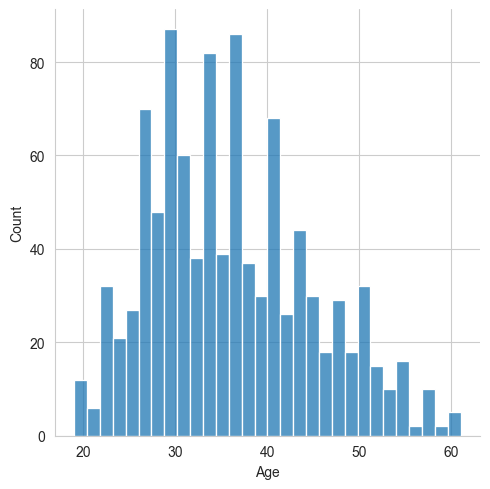

In [41]:
sns.set_style('whitegrid')
sns.displot(adv_data['Age'],bins = 30)
plt.show() # Most people are in their late 20s to late 30s, with fewer at younger and older ages.

**Creating a jointplot showing Area Income versus Age.**

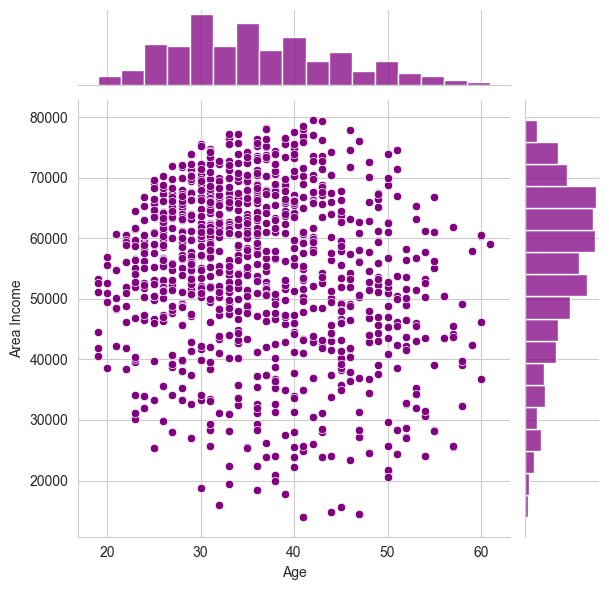

In [42]:
sns.jointplot(x='Age', y = 'Area Income', data = adv_data, color = 'purple')
plt.show() # Most people here are in their late 20s to 40s, and their area incomes cluster around $50k–$70k.

**Now Creating a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

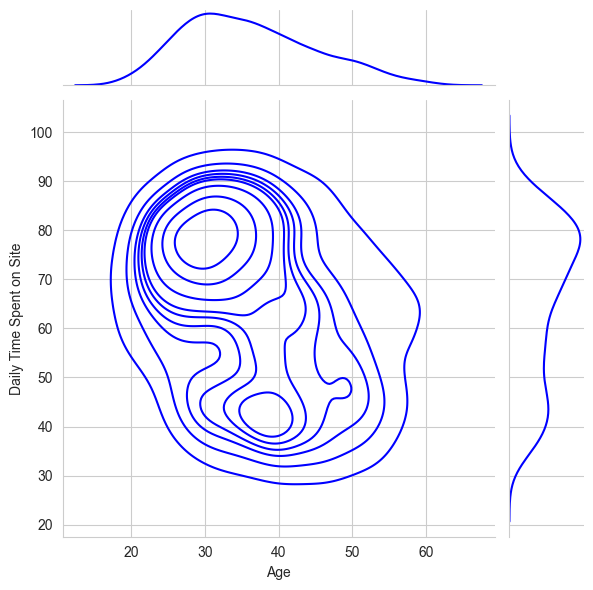

In [64]:
sns.jointplot(y= 'Daily Time Spent on Site', x = 'Age', data = adv_data,kind = 'kde',color = 'Blue')
plt.show()
# You can see two main groups here: younger users in their 30s spending more time on the site, 
# and slightly older users in their 40s with moderate site time.

**Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

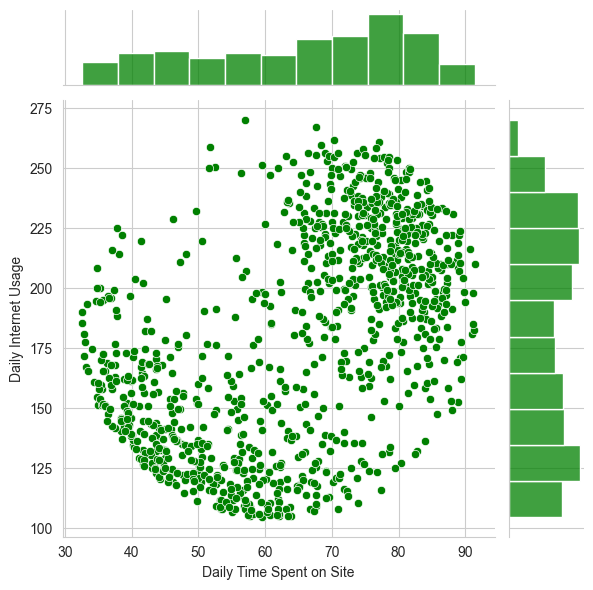

In [44]:
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = adv_data, color = 'green')
plt.show()
# This shows that people who spend more time on the site also tend to have higher overall internet usage, 
# with a big cluster of heavy users around 70–80 minutes on site and 200+ minutes online daily.

**Finally, creating a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

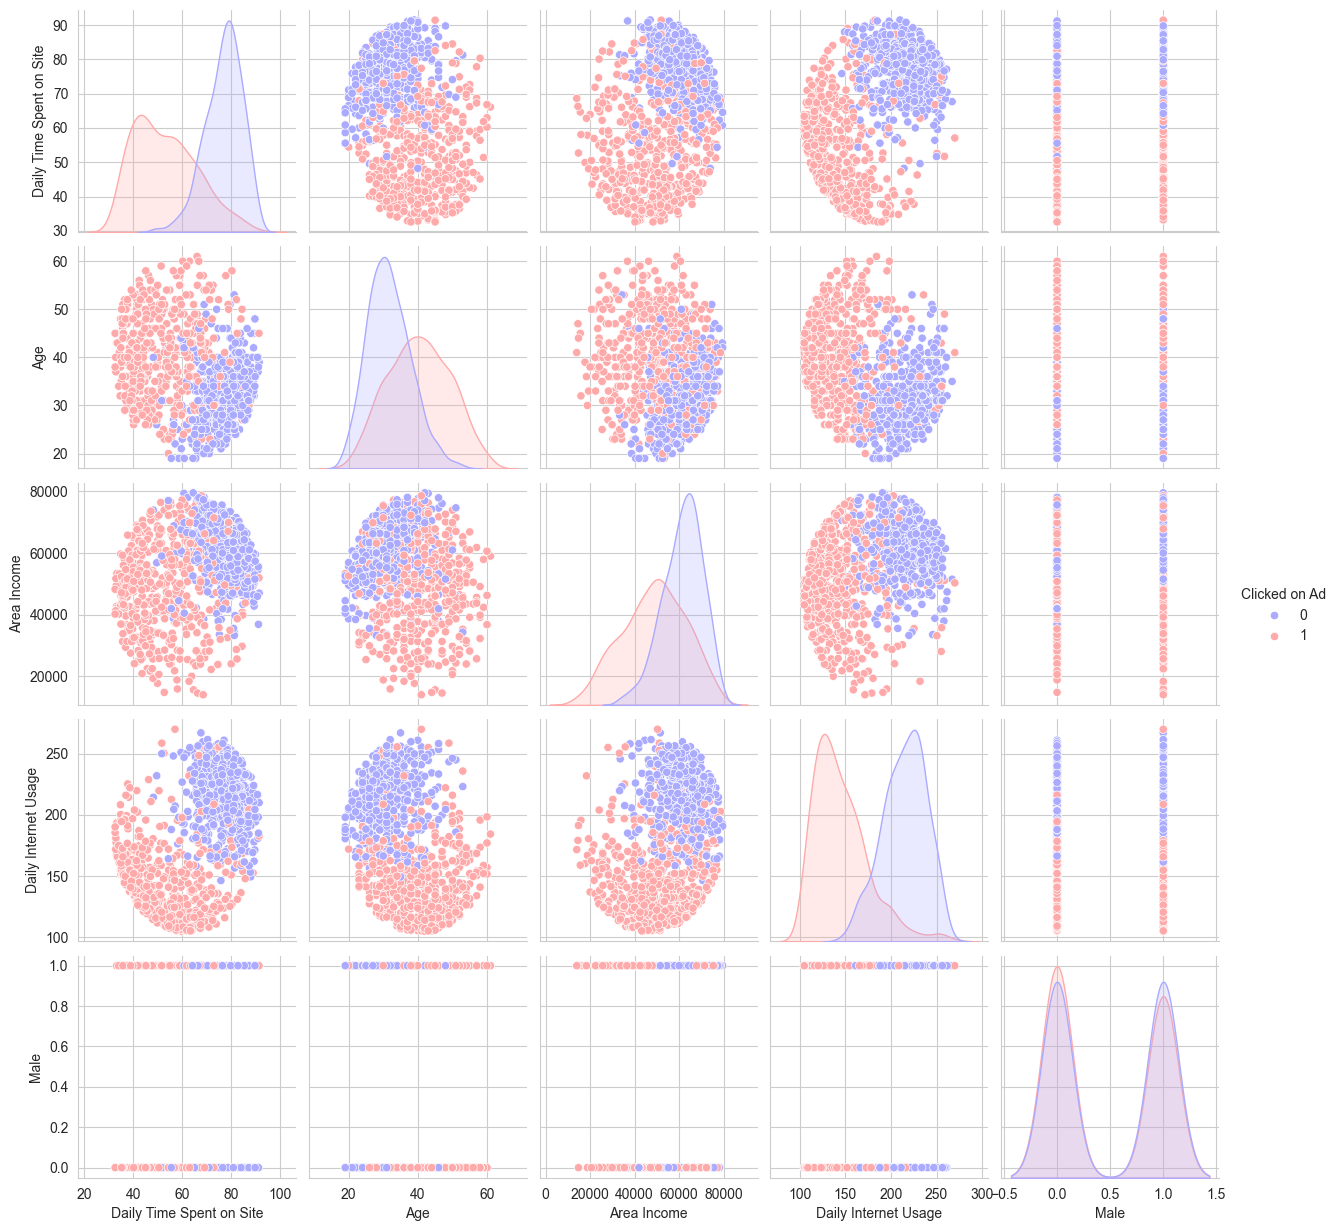

In [46]:
sns.pairplot(hue = 'Clicked on Ad', data = adv_data,palette = 'bwr')
plt.show()

These charts basically show who’s more likely to click an ad. People who clicked were usually a bit older, had slightly lower incomes, and didn’t spend as much time on the site. Those who didn’t click tended to be younger, with higher income and heavier internet use. Gender doesn’t seem to make much difference here.

# Logistic Regression

Now it's time to do a train test split and train our model!

**Splitting the data into training set and testing set**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = adv_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = adv_data['Clicked on Ad']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lg = LogisticRegression()

In [47]:
lg.fit(X_train, y_train)

/Users/vinay/Downloads/Anaconda/anaconda3/envs/econ6357/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [54]:
prediction = lg.predict(X_test)

**Create a classification report for the model.**

In [59]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



#### The model is doing a solid job, it’s right about 93% of the time. It’s very good at spotting people who didn’t click (95% recall) and almost as good at spotting those who did (90% recall). Precision is high for both groups too, so overall the predictions are balanced and trustworthy.